In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)  # Applying tanh on the final output
        output = output * self.w20
        return output


In [4]:
my_model = SimpleNN()

In [5]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [6]:
Y = my_model(X)
Y

tensor([1.7079, 1.7086, 1.7092, 1.7097, 1.7102, 1.7106, 1.7110, 1.7113, 1.7116,
        1.7118, 1.7120, 1.7121, 1.7122, 1.7122, 1.7123, 1.7122, 1.7122, 1.7120,
        1.7119, 1.7117, 1.7115, 1.7113, 1.7110, 1.7107, 1.7104, 1.7101, 1.7097,
        1.7093, 1.7089, 1.7084, 1.7080, 1.7075, 1.7070, 1.7065, 1.7059, 1.7054,
        1.7048, 1.7042, 1.7036, 1.7030])

Text(0, 0.5, 'Y')

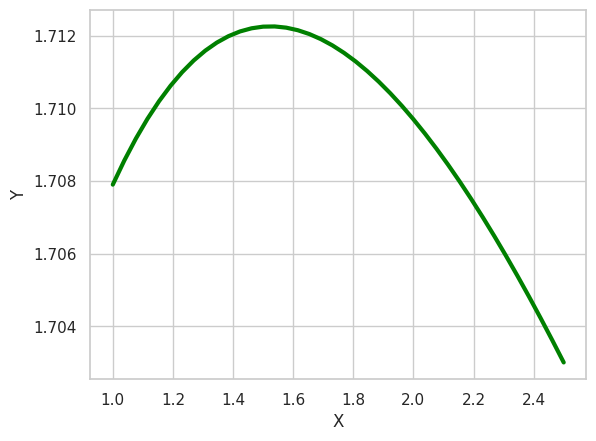

In [7]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=Y,
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [8]:
class Simple2NN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)  # Applying tanh on the final output
        output = output * self.w20
        return output

In [10]:
simple2NN = Simple2NN()

In [11]:
newY=simple2NN(X)

In [12]:
newY

tensor([0.3550, 0.3485, 0.3419, 0.3352, 0.3284, 0.3214, 0.3143, 0.3072, 0.2998,
        0.2924, 0.2849, 0.2773, 0.2696, 0.2618, 0.2539, 0.2459, 0.2379, 0.2298,
        0.2216, 0.2134, 0.2052, 0.1969, 0.1885, 0.1802, 0.1718, 0.1634, 0.1550,
        0.1466, 0.1382, 0.1299, 0.1215, 0.1132, 0.1049, 0.0967, 0.0885, 0.0804,
        0.0723, 0.0643, 0.0564, 0.0486], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

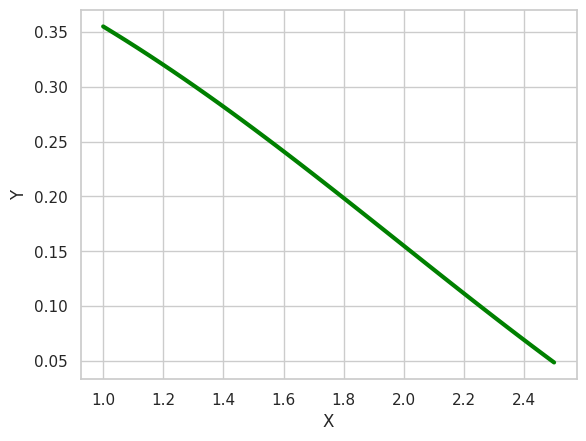

In [13]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [14]:
optimizer = SGD(simple2NN.parameters(), lr=0.01)
loss = nn.MSELoss()

In [17]:
for epoch in range(100):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simple2NN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()



Epoch:  0  | Total Loss:  tensor(0.0080, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(0.0079, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0079, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0078, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0078, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0077, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0077, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0076, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0076, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0076, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0075, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0075, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0074, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0074, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0074, grad_fn=<AddBackward0>)
Epoch:  15  | Total 

In [19]:
pred_y = simple2NN(X)
pred_y

tensor([1.7256, 1.7250, 1.7244, 1.7238, 1.7232, 1.7225, 1.7218, 1.7212, 1.7205,
        1.7197, 1.7190, 1.7182, 1.7175, 1.7167, 1.7159, 1.7150, 1.7142, 1.7133,
        1.7124, 1.7115, 1.7106, 1.7096, 1.7086, 1.7076, 1.7066, 1.7055, 1.7044,
        1.7033, 1.7022, 1.7010, 1.6998, 1.6986, 1.6973, 1.6960, 1.6947, 1.6934,
        1.6920, 1.6905, 1.6891, 1.6876], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

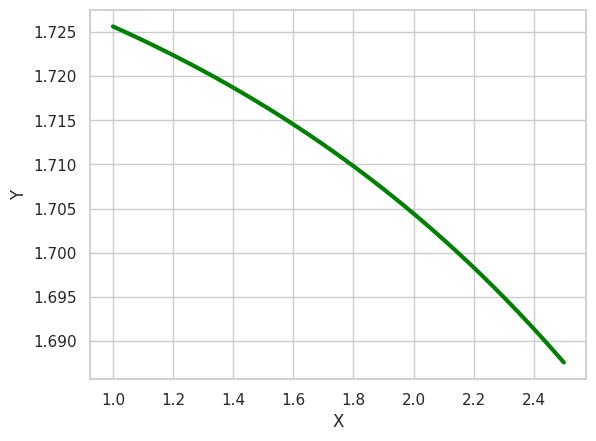

In [20]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')